# Uploading images to a blob storage

uploading images with metadara to an azure blob storage

In [34]:
from azure.storage.blob import BlobServiceClient
import matplotlib.pyplot as plt
import datetime
import sys
import os, uuid
import sys
from azure.storage.blob import BlobServiceClient, __version__
import os

import numpy as np

In [32]:
connect_str = os.environ['AZURE_STORAGE_CONNECTION_STRING']
container_name = os.environ['AZURE_STORAGE_CONTAINER_NAME']


In [33]:
blob_service_client = BlobServiceClient.from_connection_string(connect_str)
container_client = blob_service_client.get_container_client(container_name)

### List all the blob on the container

In [29]:
blob_list = container_client.list_blobs(name_starts_with="folder_name")

In [30]:
for blob in blob_list:
    print(blob)

### Upload images with metadata

In [26]:

def upload_image_to_blob_storage(image_path, blob_name, metadata=None):
    container_name = os.environ['AZURE_STORAGE_CONTAINER_NAME']

    connect_str = os.environ['AZURE_STORAGE_CONNECTION_STRING']
    try:
        
        blob_service_client = BlobServiceClient.from_connection_string(connect_str)

        try:
            container_client = blob_service_client.get_container_client(container=container_name)
            container_client.get_container_properties()
        except Exception as e:
            print(e)
            print("Creating container...")
            container_client = blob_service_client.create_container(container_name)
        with open(image_path, "rb") as data:
            blob_client = container_client.get_blob_client(blob_name)
            blob_client.upload_blob(data, overwrite=True, metadata=metadata)

        img = plt.imread(image_path)
        plt.imshow(img)
        plt.axis("off")
        
        print("Image uploaded successfully.")
    except Exception as e:
        print(f"Error uploading image: {e}")


Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.
Image uploaded successfully.


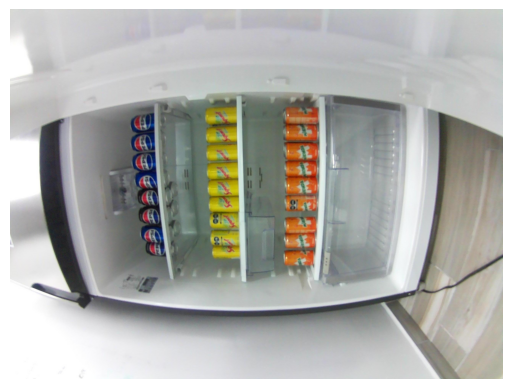

In [38]:
directory = 'imagenes'


for filename in os.listdir(directory):
    if filename.endswith(".jpg") or filename.endswith(".png"): 
        
        now = datetime.datetime.now()

        date_str = now.strftime("%Y-%m-%d")
        time_str = now.strftime("%H:%M:%S")
        metadata = {'ID': 'Image001', 'Fecha': f'{date_str}', "Hora": f"{time_str}", "Camara":"0"}
        upload_image_to_blob_storage(directory +"/" + filename, filename, metadata)
        